In [2]:
## Dashboard Section 1: Dataset Overview
import pandas as pd

# Load the dataset
accidents = pd.read_csv("Accidents.csv")
bikers = pd.read_csv("Bikers.csv")

# Merge dataset on Accident Index
df = pd.merge(accidents, bikers, on="Accident_Index")

# Show dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Show column types
print("\nColumn Data Types:")
print(df.dtypes)


# Preview top 5 rows
print("\nPreview:")
df.head()

Rows: 827861, Columns: 14

Column Data Types:
Accident_Index           object
Number_of_Vehicles        int64
Number_of_Casualties      int64
Date                     object
Time                     object
Speed_limit             float64
Road_conditions          object
Weather_conditions       object
Day                      object
Road_type                object
Light_conditions         object
Gender                   object
Severity                 object
Age_Grp                  object
dtype: object

Preview:


,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55


In [3]:
## Dashboard Section 2: Clean Data
# Remove unrealistic speed limits
df = df[df["Speed_limit"] <= 130]

# Drop rows with missing critical fields
df.dropna(subset=["Road_conditions", "Weather_conditions", "Light_conditions"], inplace=True)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop any rows where Date conversion failed
df.dropna(subset=["Date"], inplace=True)

# Extract year
df["Year"] = df["Date"].dt.year

# Confirm changes
print("Data cleaned.")
print(f"Remaining rows: {df.shape[0]}")

# Summary statistics for numerical and categorical columns
df.describe(include='all')

Data cleaned.
Remaining rows: 827860


,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,Year
count,827860,827860.000000,827860.000000,827860,827860,827860.000000,827860,827860,827860,827860,827860,827860,827860,827860,827860.000000
unique,827860,NaN,NaN,NaN,1438,NaN,6,10,7,6,3,3,3,9,NaN
top,197901A1SEE71,NaN,NaN,NaN,17:00,NaN,Dry,Clear,Wednesday,Single carriageway,Daylight,Male,Slight,11 to 15,NaN
freq,1,NaN,NaN,NaN,12122,NaN,633935,683161,136756,656703,660656,660025,681568,169943,NaN
mean,NaN,1.986178,1.047212,1996-12-30 04:28:33.611479808,NaN,33.340177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.491907
min,NaN,1.000000,1.000000,1979-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979.000000
25%,NaN,2.000000,1.000000,1987-01-16 00:00:00,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987.000000
50%,NaN,2.000000,1.000000,1995-07-29 00:00:00,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000
75%,NaN,2.000000,1.000000,2006-08-29 00:00:00,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000
max,NaN,13.000000,60.000000,2018-12-31 00:00:00,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000


/var/folders/s7/z3x459693t52vmzd62x4cnmc0000gn/T/ipykernel_47895/299966777.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Year", palette="viridis")


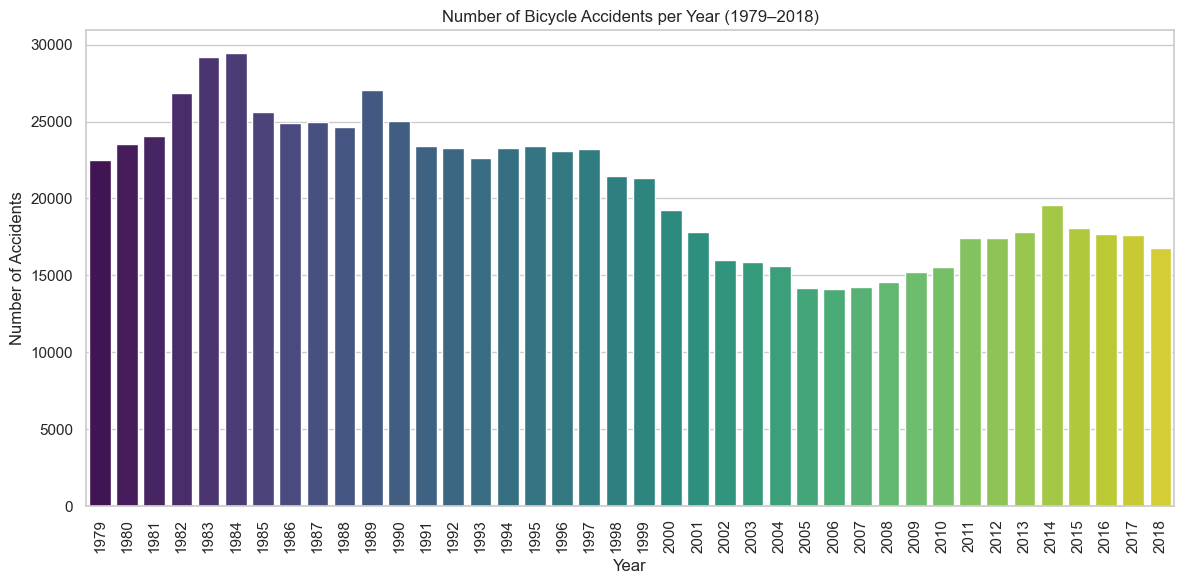

In [4]:
## Dashboard Section 3: Accidents Per Year
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Countplot of accidents by year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Year", palette="viridis")

plt.title("Number of Bicycle Accidents per Year (1979–2018)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

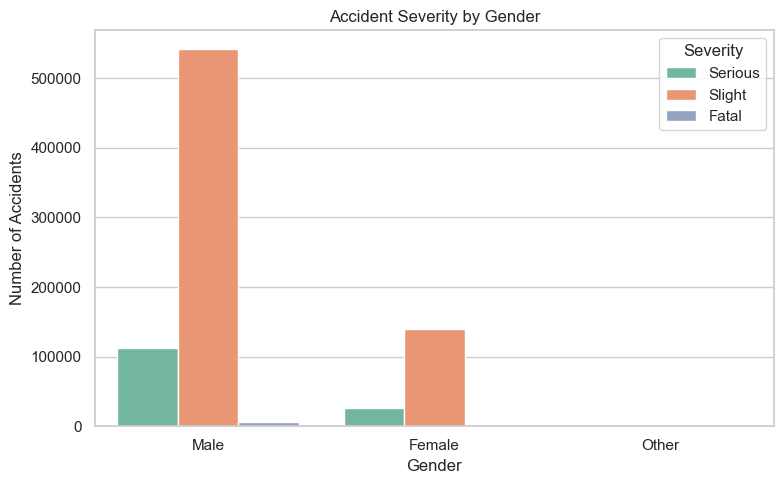

In [5]:
# Dashboard Section 4: Severity by Gender

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="Severity", palette="Set2")

plt.title("Accident Severity by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()


/var/folders/s7/z3x459693t52vmzd62x4cnmc0000gn/T/ipykernel_47895/4241585339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Age_Grp", order=sorted(df["Age_Grp"].unique()), palette="coolwarm")


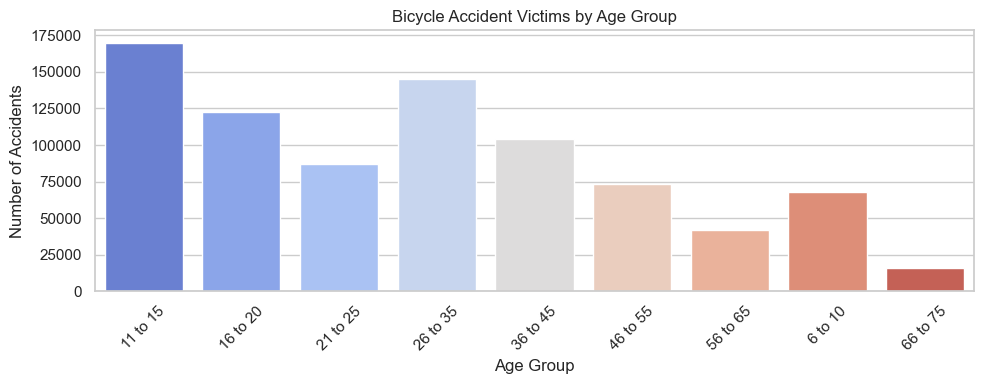

In [6]:
# Dashboard Section 5: Victims by Age Group

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="Age_Grp", order=sorted(df["Age_Grp"].unique()), palette="coolwarm")

plt.title("Bicycle Accident Victims by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/s7/z3x459693t52vmzd62x4cnmc0000gn/T/ipykernel_47895/4200903986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=df, x="Weather_conditions",
/var/folders/s7/z3x459693t52vmzd62x4cnmc0000gn/T/ipykernel_47895/4200903986.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], data=df, x="Light_conditions",


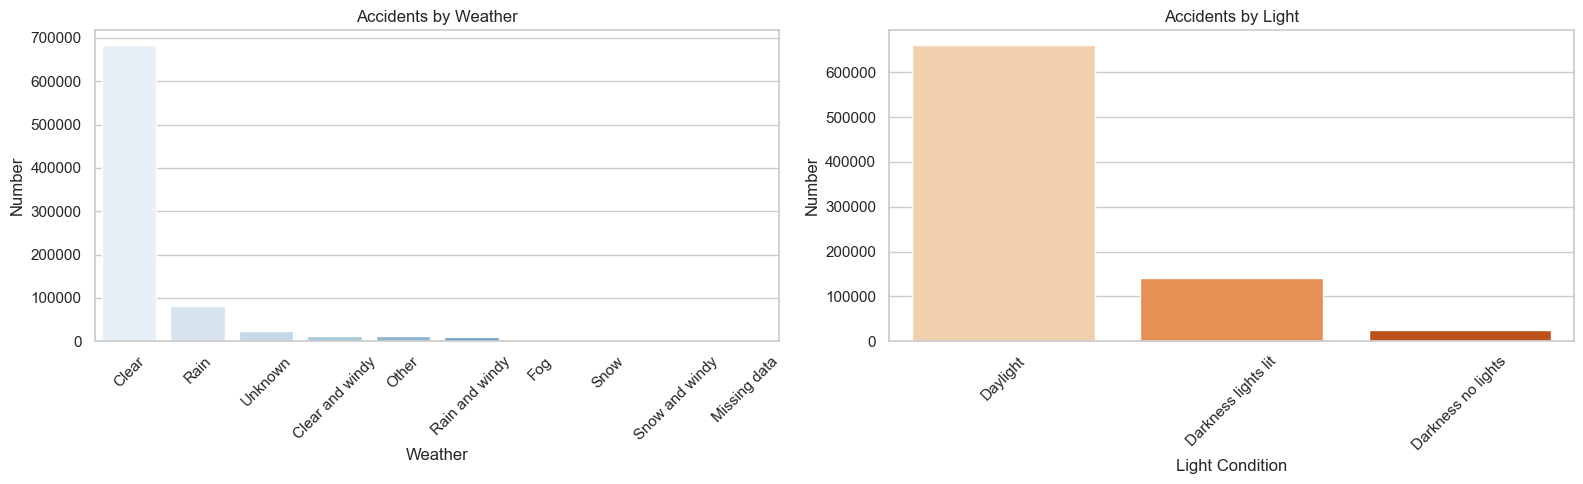

In [7]:
# Dashboard Section 6: Weather & Light Conditions (Side-by-Side)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Weather Conditions Plot
sns.countplot(ax=axes[0], data=df, x="Weather_conditions",
              order=df["Weather_conditions"].value_counts().index,
              palette="Blues")
axes[0].set_title("Accidents by Weather")
axes[0].set_xlabel("Weather")
axes[0].set_ylabel("Number")
axes[0].tick_params(axis='x', rotation=45)

# Light Conditions Plot
sns.countplot(ax=axes[1], data=df, x="Light_conditions",
              order=df["Light_conditions"].value_counts().index,
              palette="Oranges")
axes[1].set_title("Accidents by Light")
axes[1].set_xlabel("Light Condition")
axes[1].set_ylabel("Number")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [8]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown for Year
year_dropdown = widgets.Dropdown(
    options=sorted(df["Year"].unique()),
    description='Select Year:',
    style={'description_width': 'initial'}
)

# Callback function to filter & plot by year
def plot_by_year(selected_year):
    filtered = df[df["Year"] == selected_year]
    plt.figure(figsize=(8, 4))
    sns.countplot(data=filtered, x="Severity", hue="Gender", palette="Set2")
    plt.title(f"Severity by Gender in {selected_year}")
    plt.tight_layout()
    plt.show()

# Link dropdown to callback
widgets.interact(plot_by_year, selected_year=year_dropdown);


interactive(children=(Dropdown(description='Select Year:', options=(np.int32(1979), np.int32(1980), np.int32(1…